In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from datetime import datetime

In [100]:
data = pd.read_csv("AirPassengers.csv")
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [101]:
dateparse = lambda dates: datetime.strptime(dates,'%Y-%m')
data_new = pd.read_csv("AirPassengers.csv",parse_dates = ["Month"],index_col = 'Month',date_parser = dateparse)

In [102]:
ts = data_new["#Passengers"][:datetime(1957,12,1)]
ts_valid = data_new["#Passengers"][datetime(1958,1,1):]
print(ts,ts_valid)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1957-08-01    467
1957-09-01    404
1957-10-01    347
1957-11-01    305
1957-12-01    336
Name: #Passengers, Length: 108, dtype: int64 Month
1958-01-01    340
1958-02-01    318
1958-03-01    362
1958-04-01    348
1958-05-01    363
1958-06-01    435
1958-07-01    491
1958-08-01    505
1958-09-01    404
1958-10-01    359
1958-11-01    310
1958-12-01    337
1959-01-01    360
1959-02-01    342
1959-03-01    406
1959-04-01    396
1959-05-01    420
1959-06-01    472
1959-07-01    548
1959-08-01    559
1959-09-01    463
1959-10-01    407
1959-11-01    362
1959-12-01    405
1960-01-01    417
1960-02-01    391
1960-03-01    419
1960-04-01    461
1960-05-01    472
1960-06-01    535
1960-07-01    622
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, dtype: int64


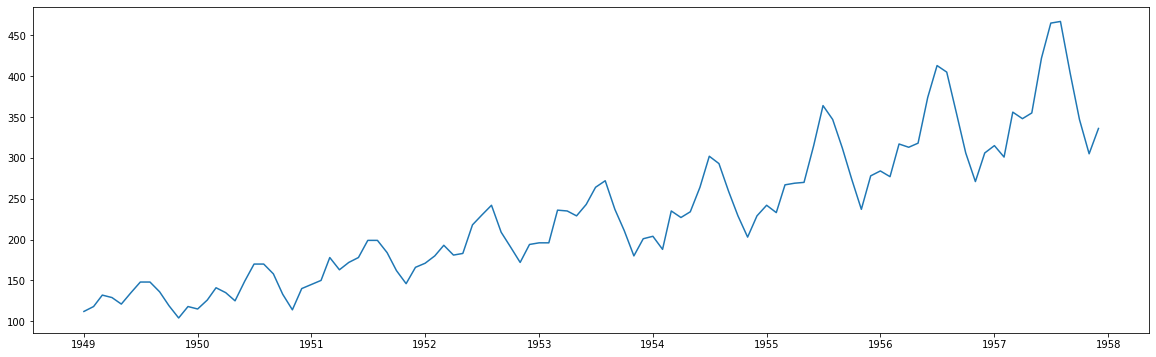

In [103]:
plt.plot(ts)
plt.show()

In [104]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Detemine Rolling Stats
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()
    
    
    #Plot rolling stats
    orig = plt.plot(timeseries,color = "blue",label = "original")
    mean = plt.plot(rolmean,color = "orange",label = "rolling mean")
    std = plt.plot(rolstd,color = "black",label = "rolling Std")
    
    plt.legend(loc = "best")
    plt.title("Rolling Mean And Rolling Standard Deviation")
    plt.show(block = False)
    
    
    #Perform Dickey Fuller Test
    
    print("Results of Dickey_Fuller Test:")
    dftest = adfuller(timeseries,autolag = "AIC")
    dfoutput = pd.Series(dftest[:4],index = ["Test Statistic",'p-value','#Lags Used','#Observations Used'])
    
    for key,value in dftest[4].items():
        dfoutput["Critical Value(%s)" %key] = value
        
    print(dfoutput)
    
    

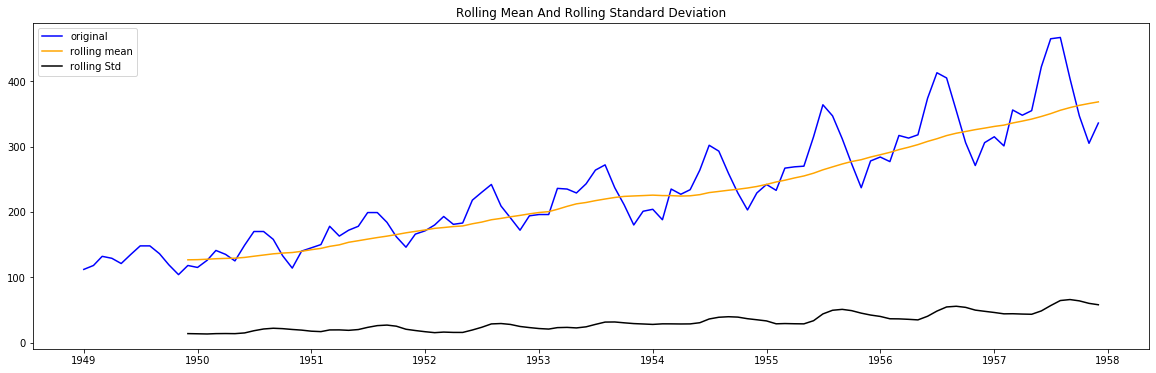

Results of Dickey_Fuller Test:
Test Statistic          1.002587
p-value                 0.994293
#Lags Used             13.000000
#Observations Used     94.000000
Critical Value(1%)     -3.501912
Critical Value(5%)     -2.892815
Critical Value(10%)    -2.583454
dtype: float64


In [105]:
test_stationarity(ts)

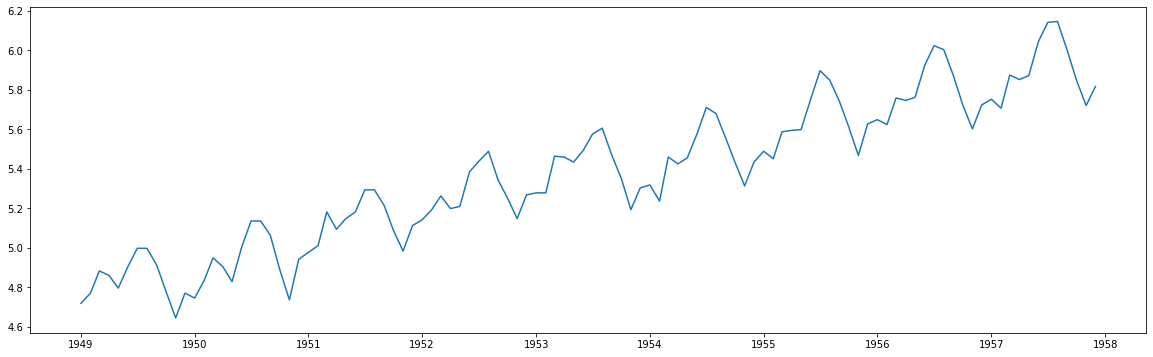

In [106]:
ts_log = np.log(ts)
plt.plot(ts_log)
plt.show()

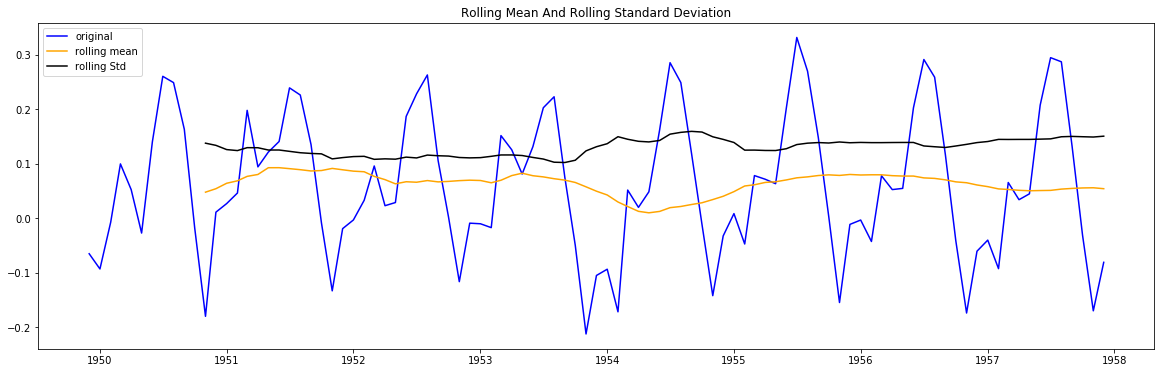

Results of Dickey_Fuller Test:
Test Statistic         -2.051890
p-value                 0.264295
#Lags Used             12.000000
#Observations Used     84.000000
Critical Value(1%)     -3.510712
Critical Value(5%)     -2.896616
Critical Value(10%)    -2.585482
dtype: float64


In [107]:
#Remove Trend from the TS

moving_avg_ts_log = pd.Series(ts_log).rolling(window=12).mean()
ts_log_moving_average_diff = ts_log - moving_avg_ts_log
ts_log_moving_average_diff.dropna(inplace = True)
test_stationarity(ts_log_moving_average_diff)

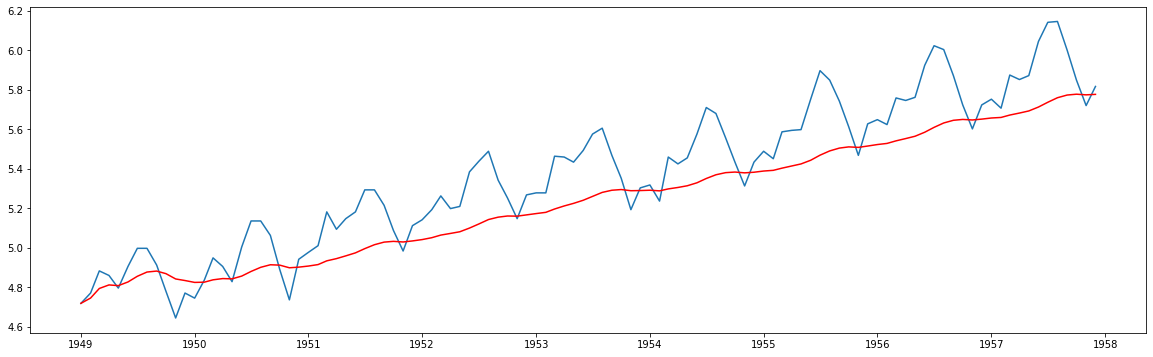

In [108]:
expweighted_avg = ts_log.ewm(halflife=12).mean()
plt.plot(ts_log)
plt.plot(expweighted_avg,color = "red")
plt.show()

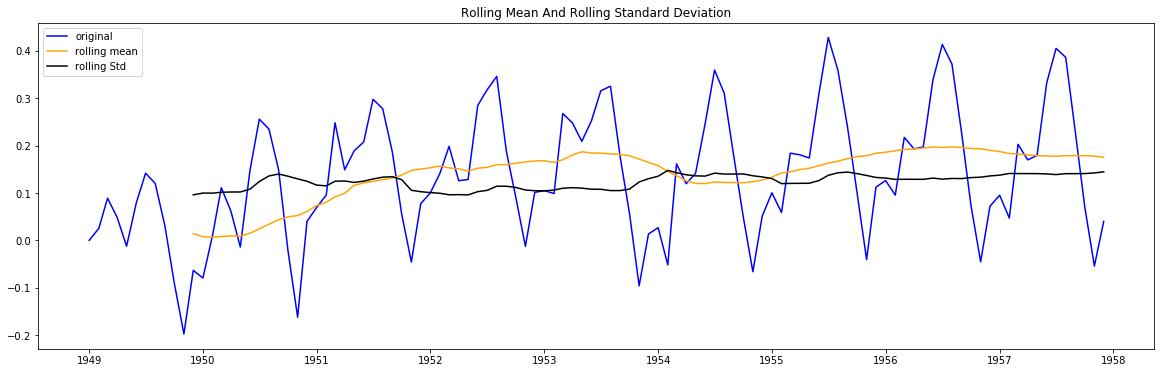

Results of Dickey_Fuller Test:
Test Statistic         -3.151730
p-value                 0.022954
#Lags Used             13.000000
#Observations Used     94.000000
Critical Value(1%)     -3.501912
Critical Value(5%)     -2.892815
Critical Value(10%)    -2.583454
dtype: float64


In [109]:
ts_log_ewm_diff = ts_log - expweighted_avg
test_stationarity(ts_log_ewm_diff)

###### After preforming this method we see that the test statistic is less than the 1% critical value which is very good.  

### Elminating Trend and Seasonality

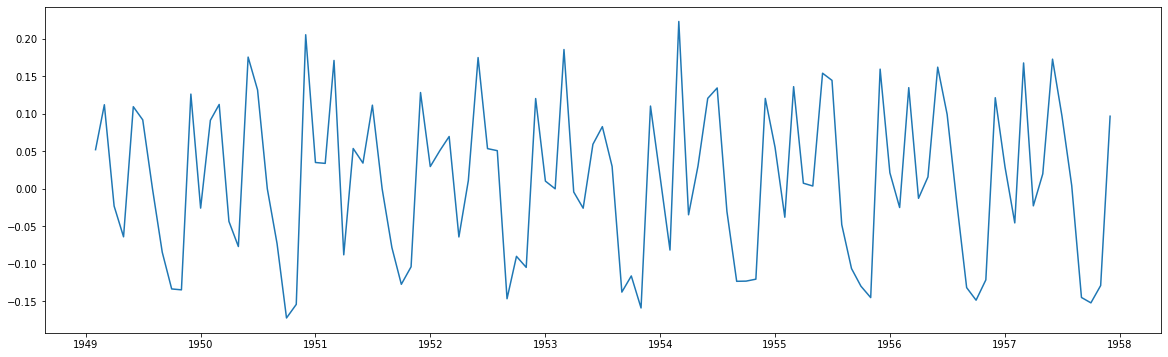

In [110]:
#Differencing

ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)
plt.show()

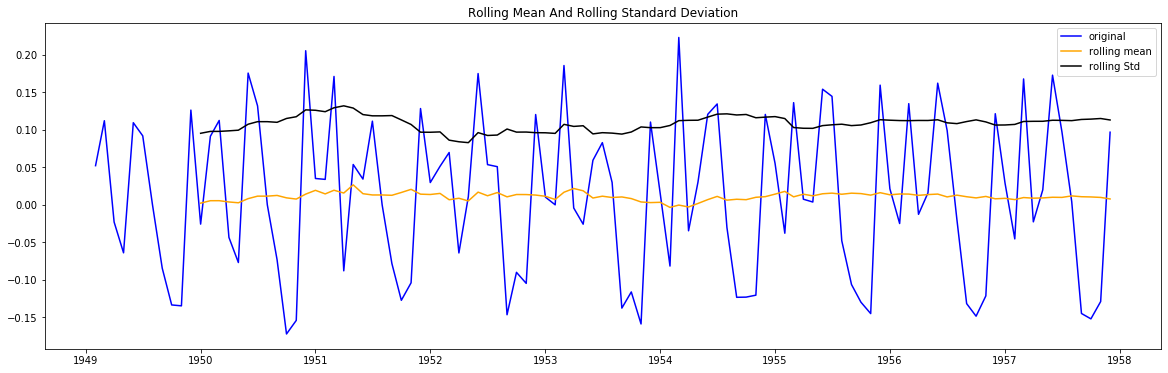

Results of Dickey_Fuller Test:
Test Statistic         -2.860949
p-value                 0.050081
#Lags Used             12.000000
#Observations Used     94.000000
Critical Value(1%)     -3.501912
Critical Value(5%)     -2.892815
Critical Value(10%)    -2.583454
dtype: float64


In [111]:
ts_log_diff.dropna(inplace = True)
test_stationarity(ts_log_diff)

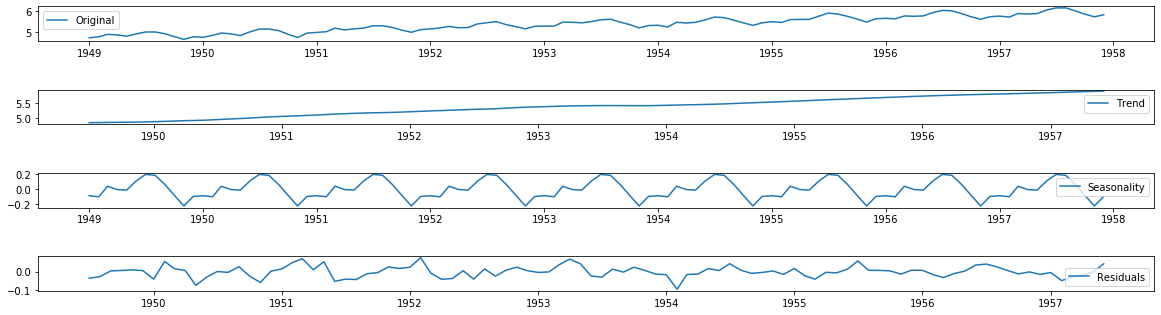

In [112]:
#Decomposing

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(811)
plt.plot(ts_log,label = "Original")
plt.legend(loc='best')
plt.subplot(813)
plt.plot(trend,label = "Trend")
plt.legend(loc='best')
plt.subplot(815)
plt.plot(seasonal,label = "Seasonality")
plt.legend(loc='best')
plt.subplot(817)
plt.plot(residual,label = "Residuals")
plt.legend(loc='best')
plt.show()

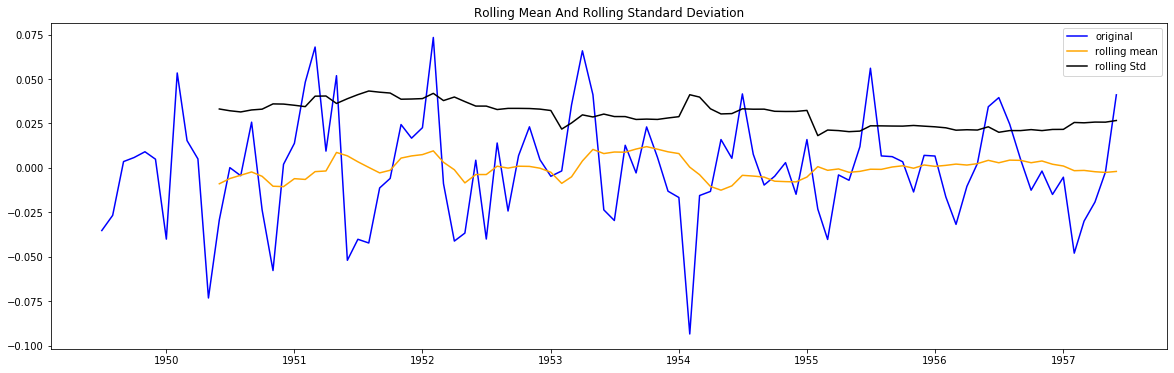

Results of Dickey_Fuller Test:
Test Statistic        -6.341389e+00
p-value                2.749210e-08
#Lags Used             3.000000e+00
#Observations Used     9.200000e+01
Critical Value(1%)    -3.503515e+00
Critical Value(5%)    -2.893508e+00
Critical Value(10%)   -2.583824e+00
dtype: float64


In [113]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace = True)
test_stationarity(ts_log_decompose)

In [114]:
# ACF and PACF plot
from statsmodels.tsa.stattools import acf,pacf

In [115]:
lag_acf = acf(ts_log_diff,nlags = 20)
lag_pacf = pacf(ts_log_diff,nlags = 20,method = 'ols')

D:\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


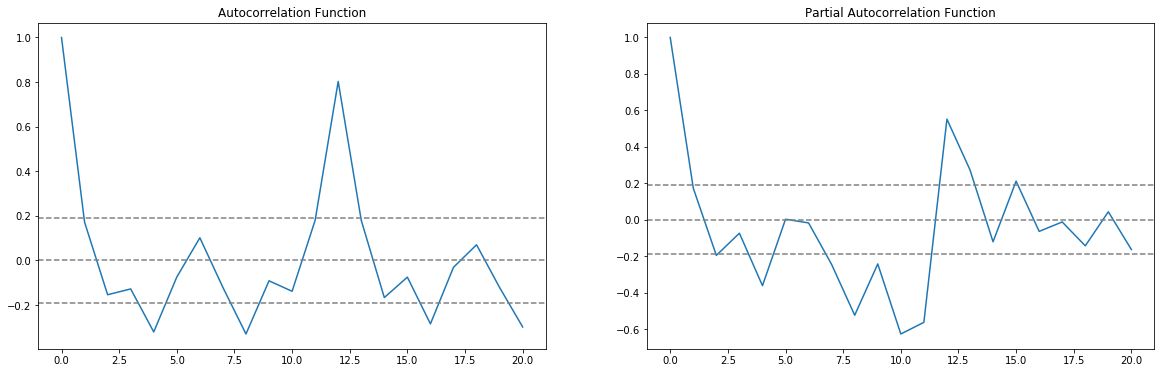

In [116]:
plt.rcParams["figure.figsize"] = (20,6)
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title("Autocorrelation Function")
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title("Partial Autocorrelation Function")
plt.show()

D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


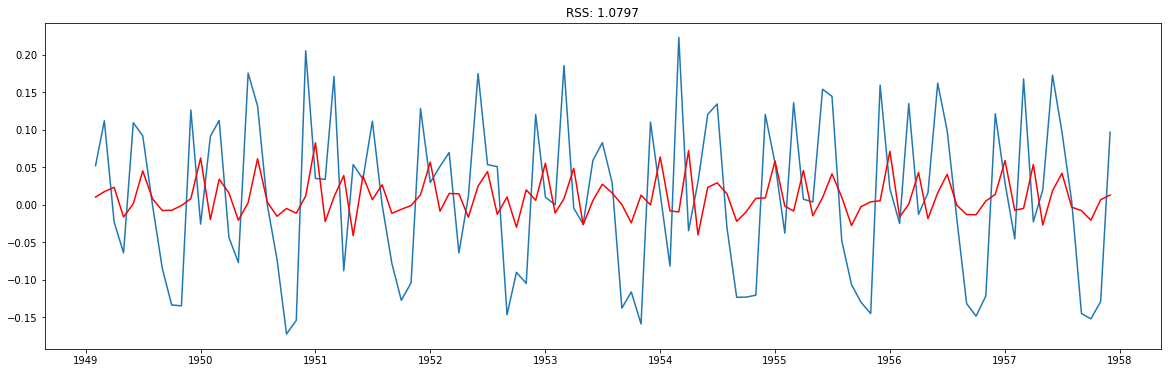

In [117]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(ts_log,order = (2,1,0))
results_AR = model.fit(disp = -1)
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues,color = "red")
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))
plt.show()

D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


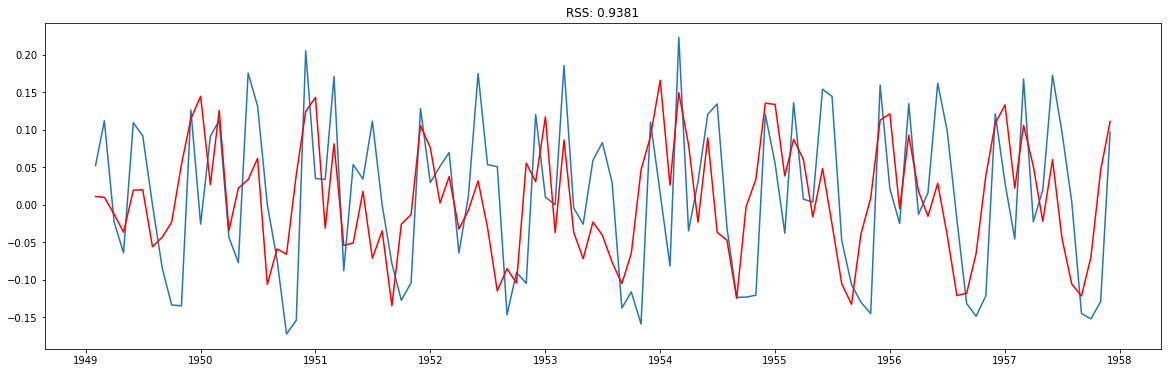

In [118]:
model = ARIMA(ts_log,order = (0,1,2))
results_AR = model.fit(disp = -1)
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues,color = "red")
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))
plt.show()

D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


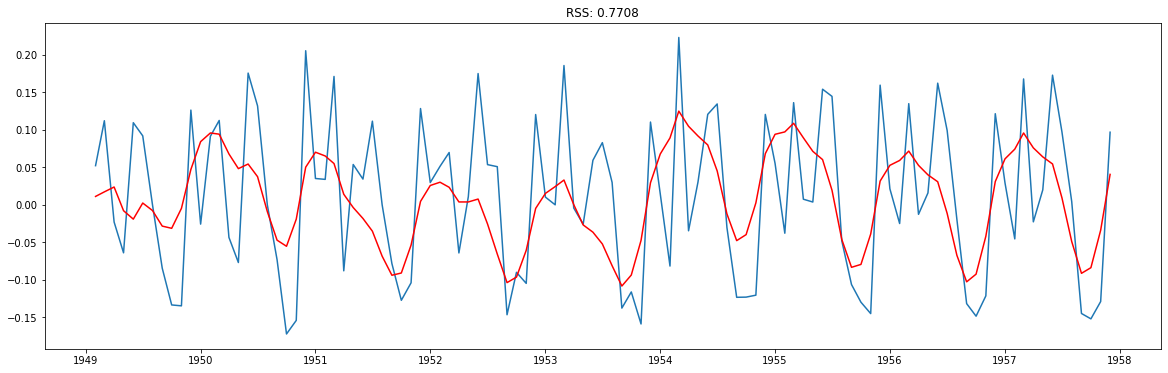

In [119]:
model = ARIMA(ts_log,order = (2,1,2))
results_ARIMA = model.fit(disp = -1)
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues,color = "red")
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))
plt.show()

In [120]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues,copy=True)


In [121]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()

In [122]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)

In [123]:
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.729666
1949-03-01    4.746918
1949-04-01    4.770644
1949-05-01    4.762775
dtype: float64

Text(0.5, 1.0, 'RMSE: 86.4437')

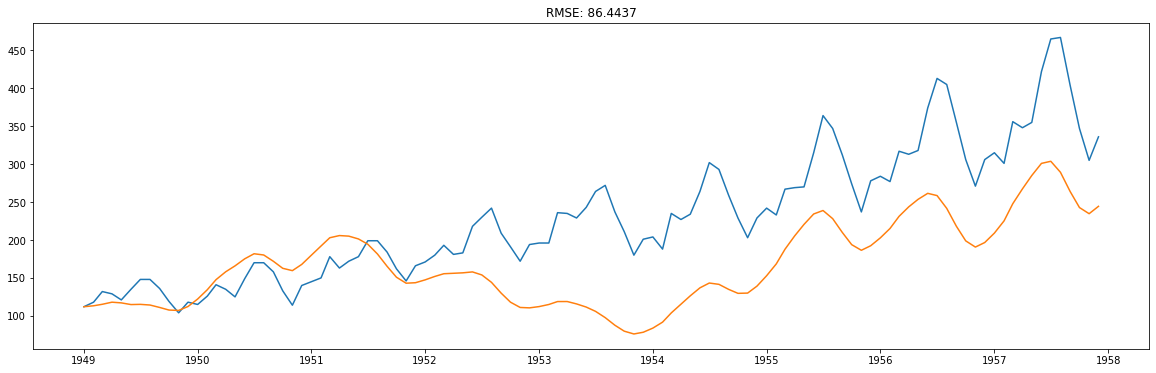

In [124]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

In [135]:
forecast_ARIMA = results_ARIMA.predict(start = datetime(1958,1,1),end = datetime(1960,12,1))
forecast_ARIMA_diff_cumsum = forecast_ARIMA.cumsum()

In [150]:
forecast_ARIMA_log = pd.Series(ts_log.iloc[-1],index = ts_valid.index )
forecast_ARIMA_log = forecast_ARIMA_log.add(forecast_ARIMA_diff_cumsum,fill_value=0)

In [151]:
forecast_ARIMA = np.exp(forecast_ARIMA_log)

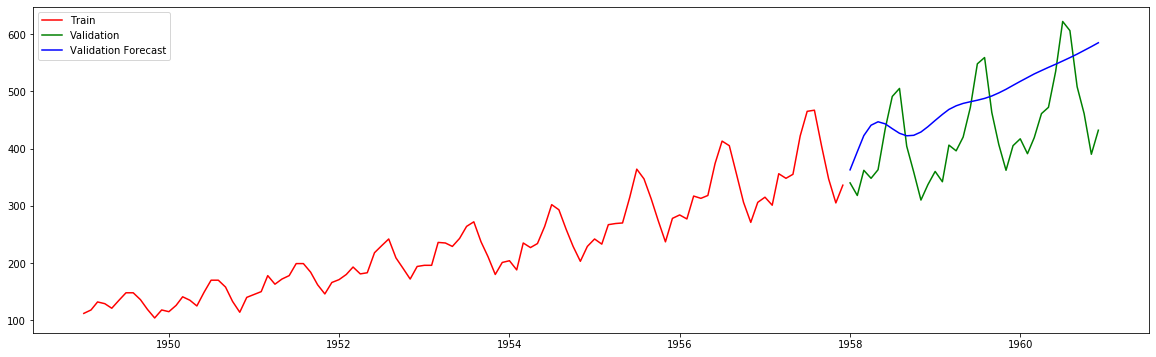

In [152]:
plt.plot(ts,color = "red",label = "Train")
plt.plot(ts_valid,color = "green",label = "Validation")
plt.plot(forecast_ARIMA,color = "blue",label = "Validation Forecast")
plt.legend()
plt.show()